In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 40
pd.options.display.max_rows = 50

In [2]:
files_names = os.listdir("pickle_files")
print(len(files_names))

11705


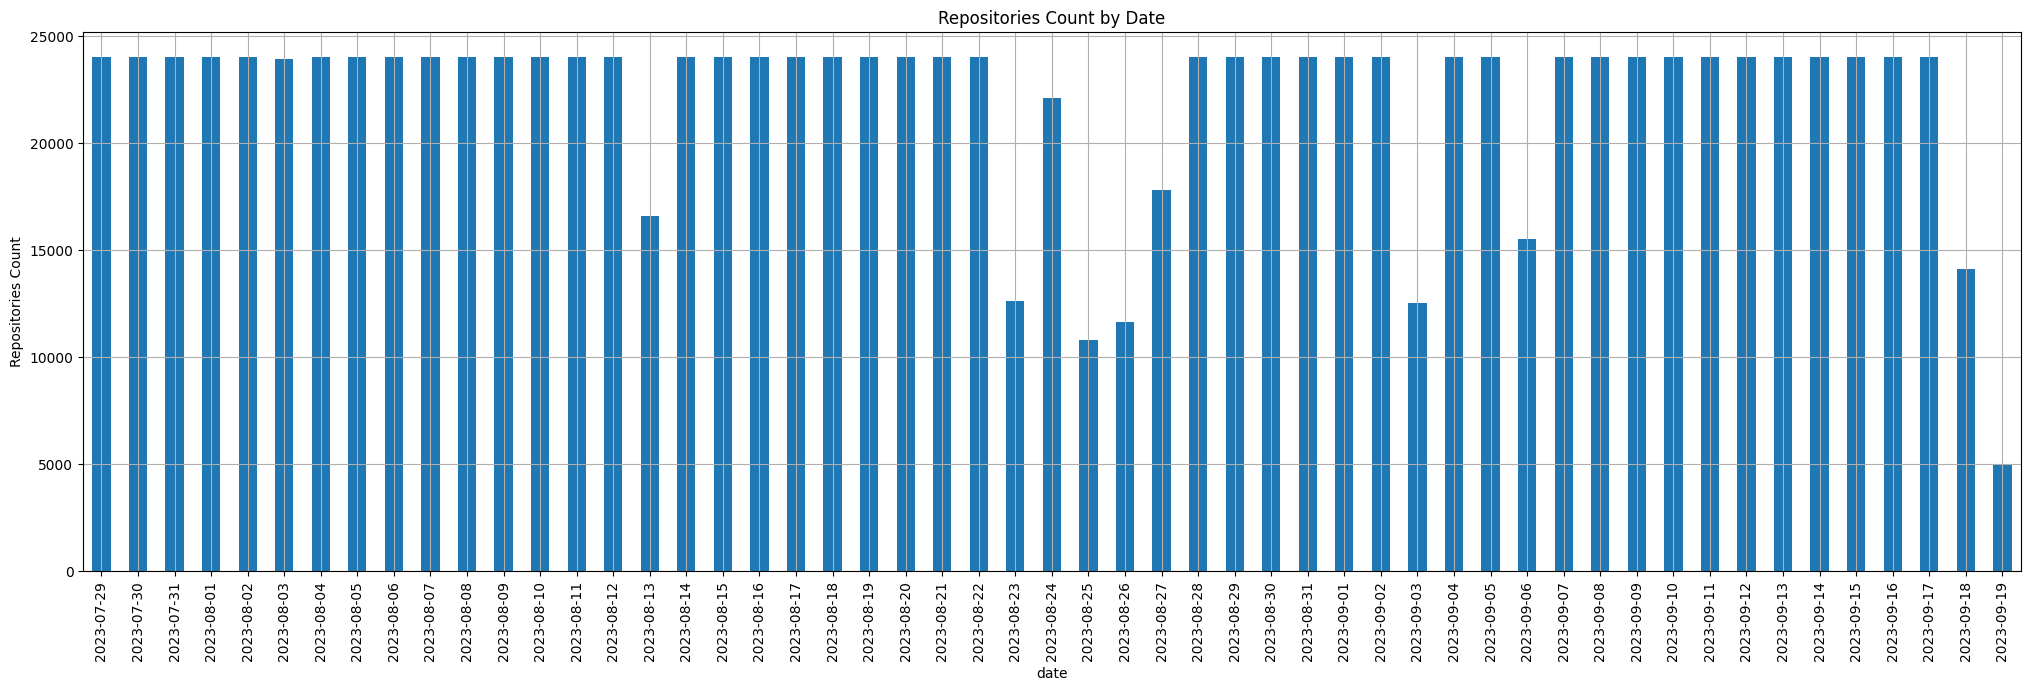

In [3]:
dates = list(map(lambda x: x.split("_")[0], files_names))
x = pd.to_datetime(pd.Series(dates)).sort_values().reset_index(drop=True).value_counts().sort_index().rename("Count").rename_axis("date")
x.index = x.index.astype(str)
x.mul(100).plot(kind='bar', grid=True, figsize=(25,7), title="Repositories Count by Date", ylabel="Repositories Count");

In [4]:
lst = []
for file_name in files_names:
    x = pickle.load(open(f"pickle_files/{file_name}", 'rb'))
    for item in x['items']:
        item = {k:v for k,v in item.items() if k in ('full_name','owner','description',"html_url","fork","created_at","updated_at","pushed_at",'homepage',"size","stargazers_count","watchers_count","language","has_issues","has_projects","has_downloads","has_wiki","has_pages","has_discussions","forks_count","archived","disabled","open_issues_count","license","allow_forking","topics","visibility","forks","open_issues","watchers","default_branch","score")}
        for k,v in item['owner'].items():
            if k in ('type', 'site_admin'):
                item["owner_" + k] = v  
        item.pop("owner")
        lst.append(item)



df = pd.DataFrame(lst)

df.homepage = df.homepage.replace("", None)

date_cols = ["created_at", "updated_at", "pushed_at"]
df[date_cols] = df[date_cols].apply(pd.to_datetime)
df.to_pickle("all-github-repos-data-combined.pkl")

In [5]:
df = pd.read_pickle("all-github-repos-data-combined.pkl")

### Duplicates

In [6]:
print("Total rows:", df.shape[0])
print(f"{df.shape[0] - df.astype(str).drop_duplicates(keep='first').shape[0]} duplicated rows found in the data")
df = df[~df.astype(str).duplicated()].reset_index(drop=True)
print("Total rows:", df.shape[0])

Total rows: 1170310
143146 duplicated rows found in the data
Total rows: 1027164


In [7]:
df.to_pickle("all-github-repos-data-combined-without-duplicates.pkl")

In [8]:
df = pd.read_pickle("all-github-repos-data-combined-without-duplicates.pkl")

In [9]:
df.topics = df.topics.apply(lambda x: None if len(x) == 0 else x)

In [10]:
df.head(4)

,full_name,html_url,description,fork,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,forks_count,archived,disabled,open_issues_count,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score,owner_type,owner_site_admin
0,tzzentt/tzzentt.github.io,https://github.com/tzzentt/tzzentt.github.io,None,False,2023-09-17 04:16:23+00:00,2023-09-18 03:06:27+00:00,2023-09-18 04:06:44+00:00,None,14,0,0,HTML,True,True,True,True,True,False,0,False,False,0,None,True,None,public,0,0,0,main,1.0,User,False
1,dunow0033/LibraryManagement,https://github.com/dunow0033/LibraryManagement,None,False,2023-09-17 04:00:03+00:00,2023-09-17 04:00:30+00:00,2023-09-18 04:06:54+00:00,None,14,0,0,Python,True,True,True,True,False,False,0,False,False,0,None,True,None,public,0,0,0,master,1.0,User,False
2,BeyondBelief96/C-Renderer-Windows,https://github.com/BeyondBelief96/C-Renderer-W...,A Windows/Visual Studio version of the C-Rende...,False,2023-09-17 04:14:09+00:00,2023-09-17 04:14:16+00:00,2023-09-18 03:33:27+00:00,None,829,0,0,C,True,True,True,True,False,False,0,False,False,0,None,True,None,public,0,0,0,master,1.0,User,False
3,kasyu-create/copy-coding1,https://github.com/kasyu-create/copy-coding1,None,False,2023-09-17 04:47:41+00:00,2023-09-17 12:00:22+00:00,2023-09-18 03:30:02+00:00,None,841,0,0,HTML,True,True,True,True,False,False,0,False,False,0,None,True,None,public,0,0,0,main,1.0,User,False


### Meta data

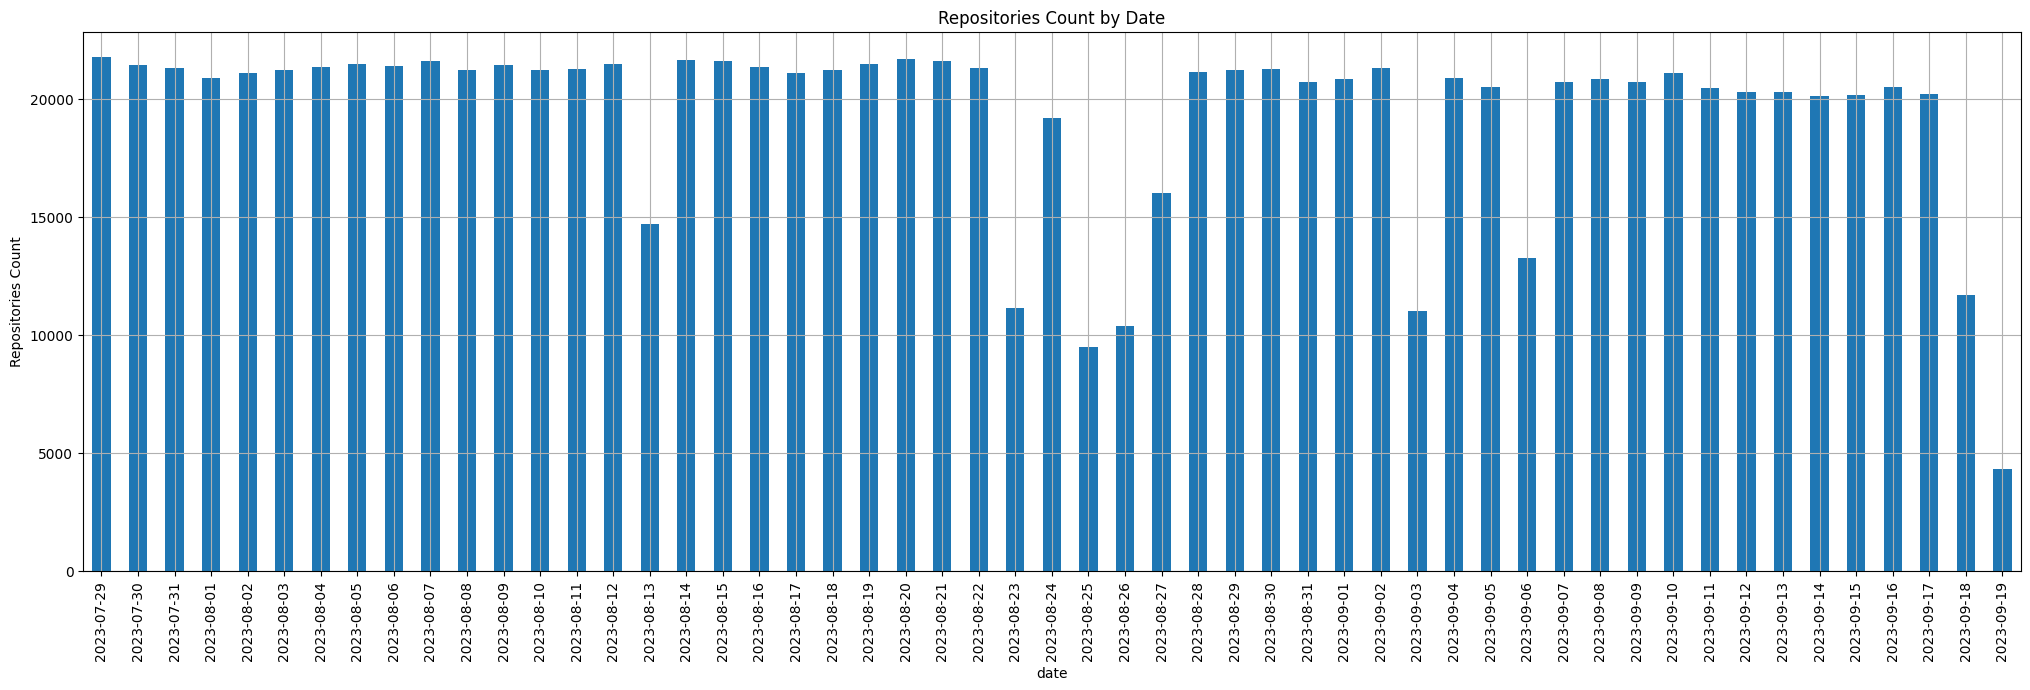

In [11]:
(
	df
	.created_at
	.dt
	.date
	.value_counts()
	.sort_index()
	.rename("Count")
	.rename_axis("date")
	.plot(
        kind='bar', 
        grid=True, 
        figsize=(25,7), 
        title="Repositories Count by Date", 
        ylabel="Repositories Count"
    )
);

In [12]:
df.describe()

,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1027164.0
mean,7.135279e+03,7.719274e-01,7.719274e-01,1.054213e-01,1.041654e-01,1.054213e-01,1.041654e-01,7.719274e-01,1.0
std,1.592261e+05,4.316260e+01,4.316260e+01,3.627993e+00,2.499052e+00,3.627993e+00,2.499052e+00,4.316260e+01,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
75%,7.570000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0
max,8.347733e+07,3.528500e+04,3.528500e+04,1.852000e+03,1.181000e+03,1.852000e+03,1.181000e+03,3.528500e+04,1.0


In [13]:
# Data types for columns
dtypes = df.dtypes.replace({
    "object" : "String",
    "bool" : "Boolean",
    "datetime64[ns, UTC]" : "DateTime",
    "int64" : "Integer"
}).astype(str).str.strip("64").str.capitalize()

dtypes.value_counts().rename("Count").rename_axis("Data Type").reset_index()

,Data Type,Count
0,Boolean,11
1,String,10
2,Integer,8
3,Datetime,3
4,Float,1


In [14]:
# Data Types
(
	dtypes
	.rename("Data Type")
	.rename_axis("Column")
	.reset_index()
	.sort_index()
)

,Column,Data Type
0,full_name,String
1,html_url,String
2,description,String
3,fork,Boolean
4,created_at,Datetime
5,updated_at,Datetime
6,pushed_at,Datetime
7,homepage,String
8,size,Integer
9,stargazers_count,Integer


In [15]:
# Is there any column that have only one unique value, such column is useless, we will remove all such columns
redundant_columns = (
	df
	.astype(str)
	.nunique()
	.eq(1)
	.sort_values(ascending=False)
	.rename("Is unique")
	.rename_axis("Column")
	.reset_index()
)
redundant_columns

,Column,Is unique
0,fork,True
1,score,True
2,disabled,True
3,allow_forking,True
4,visibility,True
5,full_name,False
6,topics,False
7,archived,False
8,open_issues_count,False
9,license,False


In [16]:
# Head and tail for redundant columns
df.loc[
    :, 
    redundant_columns.where(lambda x: x['Is unique']).dropna(how='all', axis=0).Column
]

,fork,score,disabled,allow_forking,visibility
0,False,1.0,False,True,public
1,False,1.0,False,True,public
2,False,1.0,False,True,public
3,False,1.0,False,True,public
4,False,1.0,False,True,public
...,...,...,...,...,...
1027159,False,1.0,False,True,public
1027160,False,1.0,False,True,public
1027161,False,1.0,False,True,public
1027162,False,1.0,False,True,public


In [17]:
# Droping redundant_columns
(
	df
	.drop(
        columns = redundant_columns
        .where(lambda x: x['Is unique'])
        .dropna(how='all', axis=0)
        .Column, 
        inplace=True
    )
)
df.head(4)

,full_name,html_url,description,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,forks_count,archived,open_issues_count,license,topics,forks,open_issues,watchers,default_branch,owner_type,owner_site_admin
0,tzzentt/tzzentt.github.io,https://github.com/tzzentt/tzzentt.github.io,None,2023-09-17 04:16:23+00:00,2023-09-18 03:06:27+00:00,2023-09-18 04:06:44+00:00,None,14,0,0,HTML,True,True,True,True,True,False,0,False,0,None,None,0,0,0,main,User,False
1,dunow0033/LibraryManagement,https://github.com/dunow0033/LibraryManagement,None,2023-09-17 04:00:03+00:00,2023-09-17 04:00:30+00:00,2023-09-18 04:06:54+00:00,None,14,0,0,Python,True,True,True,True,False,False,0,False,0,None,None,0,0,0,master,User,False
2,BeyondBelief96/C-Renderer-Windows,https://github.com/BeyondBelief96/C-Renderer-W...,A Windows/Visual Studio version of the C-Rende...,2023-09-17 04:14:09+00:00,2023-09-17 04:14:16+00:00,2023-09-18 03:33:27+00:00,None,829,0,0,C,True,True,True,True,False,False,0,False,0,None,None,0,0,0,master,User,False
3,kasyu-create/copy-coding1,https://github.com/kasyu-create/copy-coding1,None,2023-09-17 04:47:41+00:00,2023-09-17 12:00:22+00:00,2023-09-18 03:30:02+00:00,None,841,0,0,HTML,True,True,True,True,False,False,0,False,0,None,None,0,0,0,main,User,False


In [18]:
# How many unique columns exist in the data
(
	df
	.astype(str)
	.apply(
        lambda col: col.is_unique
    )
    .sum()
)

0

In [19]:
# Unique values in each column
x = (
	df
	.select_dtypes("O")
	.astype(str)
	.nunique()
	.sort_values()
	.rename("unique_values_count")
	.rename_axis("Column")
	.reset_index()
)
x['on_average_every_unique_value_repeated_times'] = x.apply(lambda row: df[row.Column].count()/row.unique_values_count, axis=1)
x

,Column,unique_values_count,on_average_every_unique_value_repeated_times
0,owner_type,2,513582.000000
1,license,43,2750.372093
2,language,367,1986.185286
3,default_branch,5721,179.542737
4,topics,30871,2.033915
5,homepage,87465,1.016955
6,description,317899,1.185870
7,full_name,1027142,1.000021
8,html_url,1027142,1.000021


### NaNs

In [20]:
# NaNs count and percentage in the hole data
print("NaNs count:", df.isna().sum().sum())
print("NaNs Percentage:", f"{(df.isna().mean().mean() * 100).round(2)}%")

NaNs count: 3759900
NaNs Percentage: 13.07%


In [21]:
# NaNs count and percentage by columns
(
	df
	.isna()
	.sum()
	.where(lambda x: x>0)
	.dropna()
	.sort_values()
	.rename("NaNs Count")
	.rename_axis("Column")
	.reset_index()
	.assign(
        NaNs_Perc=lambda x: (x['NaNs Count']/df.shape[0]).mul(100).round(2).astype(str).add(" %")
    )
)

,Column,NaNs Count,NaNs_Perc
0,language,298234.0,29.03 %
1,description,650177.0,63.3 %
2,license,908898.0,88.49 %
3,homepage,938216.0,91.34 %
4,topics,964375.0,93.89 %


In [22]:
# NaNs count and percentage by rows
(
	df
	.isna()
	.sum(axis=1)
	.value_counts()
	.sort_index()
	.rename_axis("Count of NaNs in a row")
	.rename("Count")
	.reset_index()
)

# So there are 75141 rows that have only one NaN in each.

,Count of NaNs in a row,Count
0,0,4978
1,1,18589
2,2,100191
3,3,249829
4,4,476443
5,5,177134


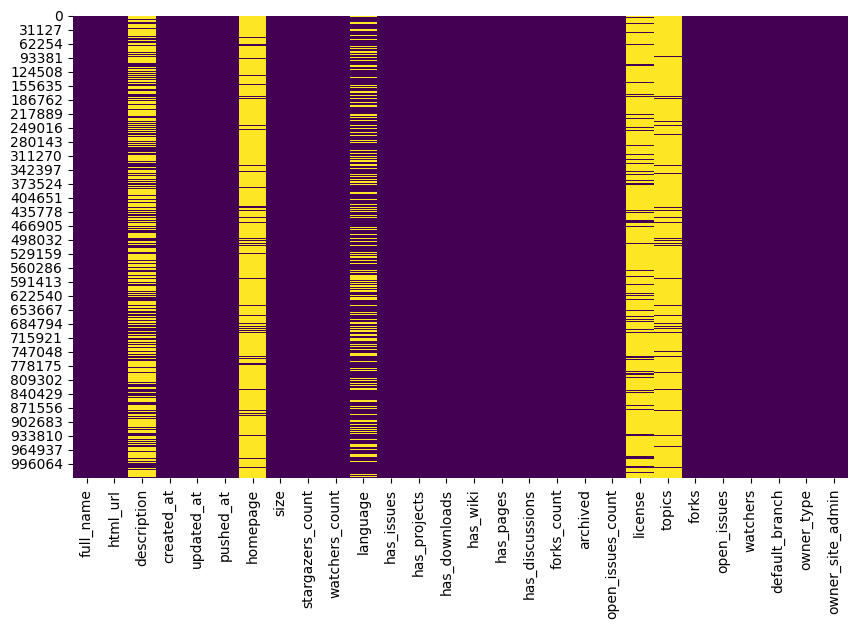

In [23]:
# Heatmap for NaNs

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.show()

### Summary

In [24]:
df.describe()

,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers
count,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06,1.027164e+06
mean,7.135279e+03,7.719274e-01,7.719274e-01,1.054213e-01,1.041654e-01,1.054213e-01,1.041654e-01,7.719274e-01
std,1.592261e+05,4.316260e+01,4.316260e+01,3.627993e+00,2.499052e+00,3.627993e+00,2.499052e+00,4.316260e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.570000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,8.347733e+07,3.528500e+04,3.528500e+04,1.852000e+03,1.181000e+03,1.852000e+03,1.181000e+03,3.528500e+04


### html_url

In [25]:
mask = df.html_url.value_counts().eq(1)
print(f"{df.html_url.count()-mask.sum()} ({round((1-(mask.mean()))*100,3)}%) duplicated html_url found")

44 (0.002%) duplicated html_url found


In [26]:
# Duplicated html_url
(
	df.html_url[
        df
    	.html_url
    	.duplicated(keep=False)
    ]
	.value_counts()
	.sort_index()
)

https://github.com/AIA-UnKNOWN/dinner-reservation                                             2
https://github.com/Andoniank/fitness_project                                                  2
https://github.com/Brittany-Edwards/html-portfolio                                            2
https://github.com/DKS-wift/TuistPG                                                           2
https://github.com/DaffaGusti17/latihan1-revoU                                                2
https://github.com/Hadeelmyname/alx-low_level_programming                                     2
https://github.com/Implosion1121/Python-Exercise3                                             2
https://github.com/KamalSaru/FullStackProject                                                 2
https://github.com/Lelegoyeng/my-dashboard                                                    2
https://github.com/Ling930616/aboutme                                                         2
https://github.com/Polar-69/Pag-Bungou  

In [27]:
# Since there are very few duplicated value in html_url, we can compare rows for each duplicated html_url, to see what are the differences between two rows for same html_url value 
duplicated_html_url = df.html_url[df.html_url.duplicated()].to_list()
for d_html_url in duplicated_html_url:
    print(d_html_url)
    r = df[df.html_url.eq(d_html_url)].T
    print(r.loc[r.apply(lambda x:x.iloc[0] != x.iloc[1] , axis=1)].T.to_string())
    print("\n")

https://github.com/iquinde/django-auth-crud
                      created_at                updated_at                 pushed_at size
61466  2023-09-19 03:41:23+00:00 2023-09-19 03:42:40+00:00 2023-09-19 04:48:01+00:00   14
110834 2023-09-16 02:19:10+00:00 2023-09-16 02:21:02+00:00 2023-09-16 02:27:09+00:00   13


https://github.com/isaac-svg/simple_shell
                      created_at                updated_at                 pushed_at size default_branch
22691  2023-09-10 19:06:25+00:00 2023-09-10 19:06:38+00:00 2023-09-10 19:42:50+00:00   19         master
148954 2023-09-19 02:19:52+00:00 2023-09-19 02:20:24+00:00 2023-09-19 03:05:58+00:00   53           main


https://github.com/DKS-wift/TuistPG
       description                created_at                updated_at                 pushed_at size stargazers_count watchers_count watchers default_branch
44324         None 2023-09-19 02:05:25+00:00 2023-09-19 02:05:32+00:00 2023-09-19 03:46:04+00:00   27                0             

### Description

In [28]:
# 20 most frequent descriptions
(
	df
	.description
	.astype(str)
	.str
	.strip()
	.str
	.lower()
	.replace({"none": None})
	.value_counts()
	.rename_axis("Description")
	.rename("Count")
	.head(20)
	.reset_index()
)

,Description,Count
0,config files for my github profile.,29122
1,my clone repository,2500
2,"i'm now a alx student, this is my first reposi...",2190
3,this react_native application was built with c...,1416
4,created with stackblitz ⚡️,1016
5,created with codesandbox,935
6,this is my first repository as a full-stack en...,830
7,test,600
8,"to report an issue or request an update, go to...",499
9,gitops repository,446


In [29]:
mask = ~df.description.dropna().apply(str.isascii)
print(
    f"There are {mask.sum()} ({(mask.mean() *100).round(1)}%) "
    "values that contains non-unicode character"
)

There are 47035 (12.5%) values that contains non-unicode character


In [30]:
# Top 20 descriptions that have non-asci character
(
	df
	.description
	.dropna()[mask]
	.value_counts()
	.rename("Count")
	.rename_axis("description")
	.reset_index()
	.head(20)
)

,description,Count
0,Created with StackBlitz ⚡️,1016
1,"Проект ""Оно тебе надо""",30
2,个人博客,30
3,图床,27
4,"Проект ""Посмотри в окно""",26
5,测试,25
6,Темплейт проектной работы курса Веб-разработчи...,23
7,Kodluyoruz Eğitimi kapsamında açtığım ilk repo,23
8,远程仓库测试,23
9,IT인을 위한 티셔츠 쇼핑몰 오픈소스,20


### created_at

In [31]:
df['repo_age_days'] = (
	(
        pd.Timestamp.now() - df.created_at.astype("datetime64[ns]")
    )
	.dt
	.days
)

/tmp/ipykernel_1210628/460706373.py:3: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  pd.Timestamp.now() - df.created_at.astype("datetime64[ns]")


In [32]:
# Extract date and time components from `created_at`
date_components = (
	df
	.created_at
	.apply(
        lambda x: 
            pd.Series(
                [
                    x.year, 
                    x.month, 
                    x.weekday(), 
                    x.strftime('%A'), 
                    x.week, 
                    x.day, 
                    x.quarter, 
                    x.hour, 
                    x.minute
                ]
            )
    )
)
date_components.columns = ["Year", "Month", "Weekday", "DayName", "Week", "day", "Quarter", "Hour", "Minute"]
date_components

,Year,Month,Weekday,DayName,Week,day,Quarter,Hour,Minute
0,2023,9,6,Sunday,37,17,3,4,16
1,2023,9,6,Sunday,37,17,3,4,0
2,2023,9,6,Sunday,37,17,3,4,14
3,2023,9,6,Sunday,37,17,3,4,47
4,2023,9,6,Sunday,37,17,3,4,43
...,...,...,...,...,...,...,...,...,...
1027159,2023,9,0,Monday,36,4,3,8,44
1027160,2023,9,0,Monday,36,4,3,8,57
1027161,2023,9,0,Monday,36,4,3,8,46
1027162,2023,9,0,Monday,36,4,3,8,2


In [33]:
d = (
	date_components
	.Month
	.value_counts()
	.rename("Count")
	.rename_axis("Month (created_at)")
	.sort_index()
	.reset_index()
	.assign(
        Perc=lambda x: round(x.Count/df.created_at.count()*100,2).astype(str).add(" %")
    )
)
d

,Month (created_at),Count,Perc
0,7,64457,6.28 %
1,8,613659,59.74 %
2,9,349048,33.98 %


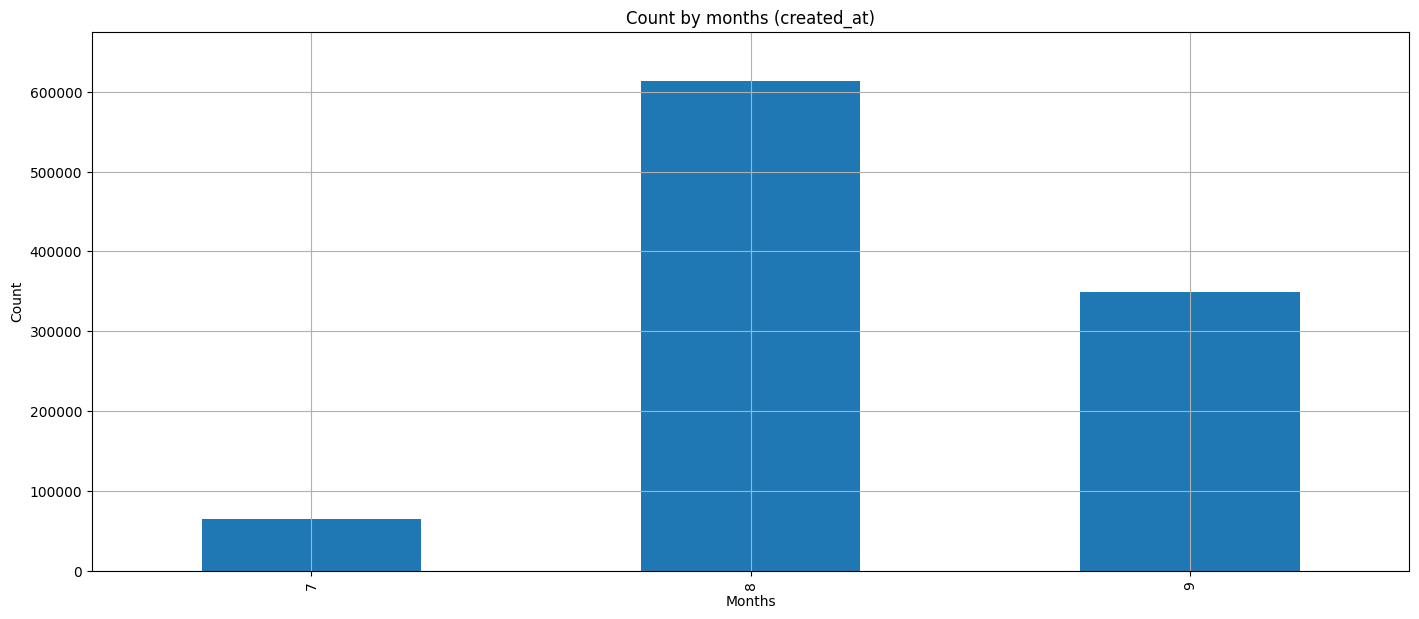

In [34]:
import matplotlib.pyplot as plt
(
	date_components
	.Month
	.value_counts()
	.rename("Count")
	.rename_axis("Month (created_at)")
	.sort_index()
	.plot(
        kind='bar', 
        figsize=(17,7), 
        grid=True, 
        title="Count by months (created_at)"
    )
)
plt.xlabel("Months")
plt.ylabel("Count")
plt.ylim(0, d.Count.max()*1.1)
plt.show()


In [35]:
x = (
	date_components
	.Weekday
	.value_counts()
	.rename("Count")
	.rename_axis("Weekday (created_at)")
	.sort_index()
	.reset_index()
	.assign(
        Perc=lambda x: round(x.Count/df.created_at.count()*100,2).astype(str).add(" %")
    )
)
x['Weekday (created_at)'] = x['Weekday (created_at)'].map(dict(zip(list(range(7)), ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])))
x

,Weekday (created_at),Count,Perc
0,Monday,160217,15.6 %
1,Tuesday,151303,14.73 %
2,Wednesday,129781,12.63 %
3,Thursday,144258,14.04 %
4,Friday,135093,13.15 %
5,Saturday,159042,15.48 %
6,Sunday,147470,14.36 %


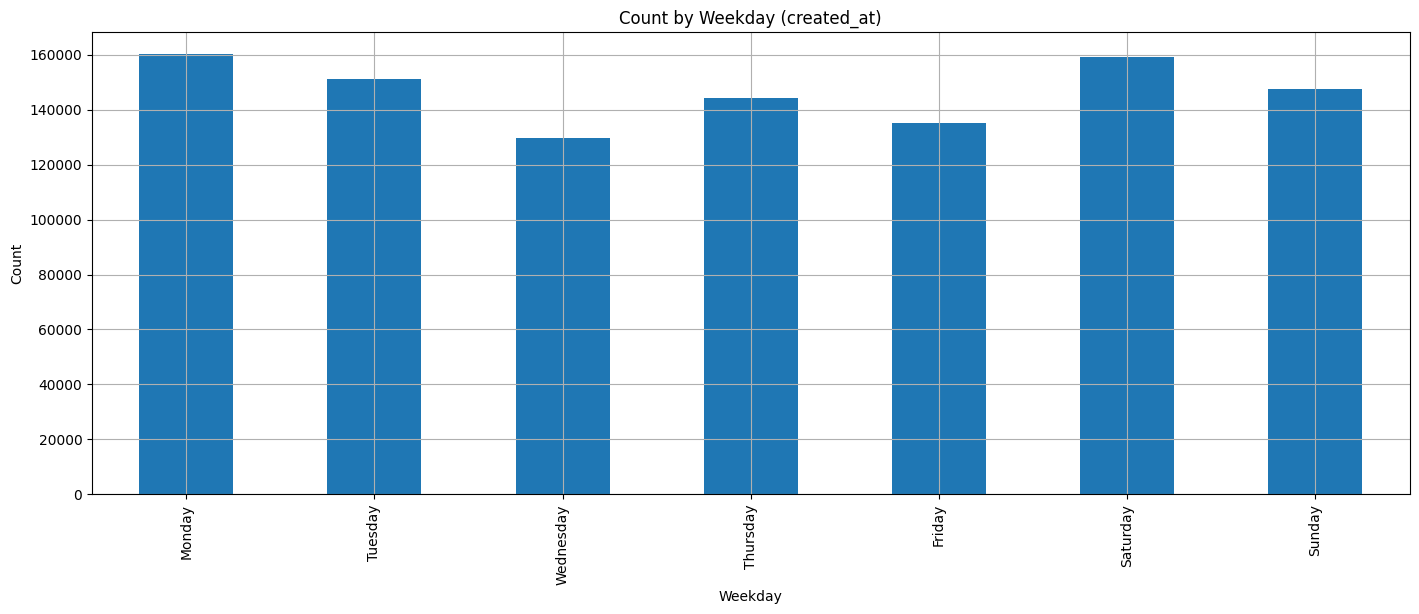

In [36]:
(
	x
	.set_index("Weekday (created_at)")
	.Count
	.plot(
        kind='bar', 
        figsize=(17,6), 
        grid=True, 
        title="Count by Weekday (created_at)"
    )
)
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

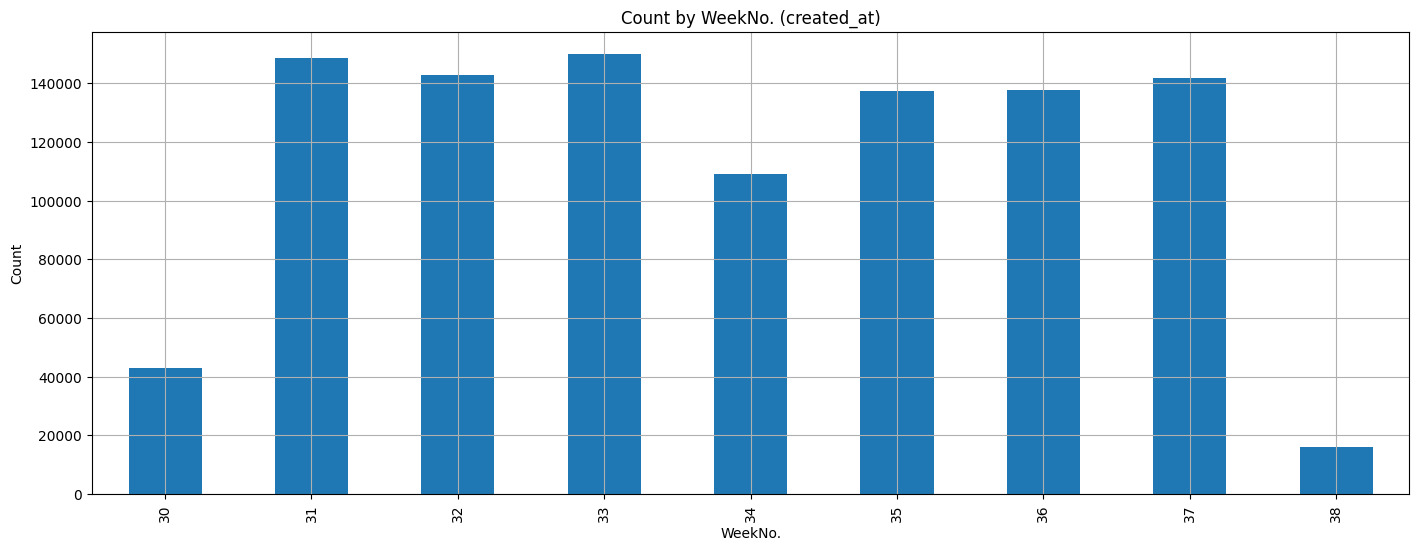

In [37]:
(
	date_components
	.Week
	.value_counts()
	.sort_index()
	.plot(
        kind='bar',
        figsize=(17,6), 
        grid=True, 
        title="Count by WeekNo. (created_at)"
    )
)

plt.xlabel("WeekNo.")
plt.ylabel("Count")
plt.show()

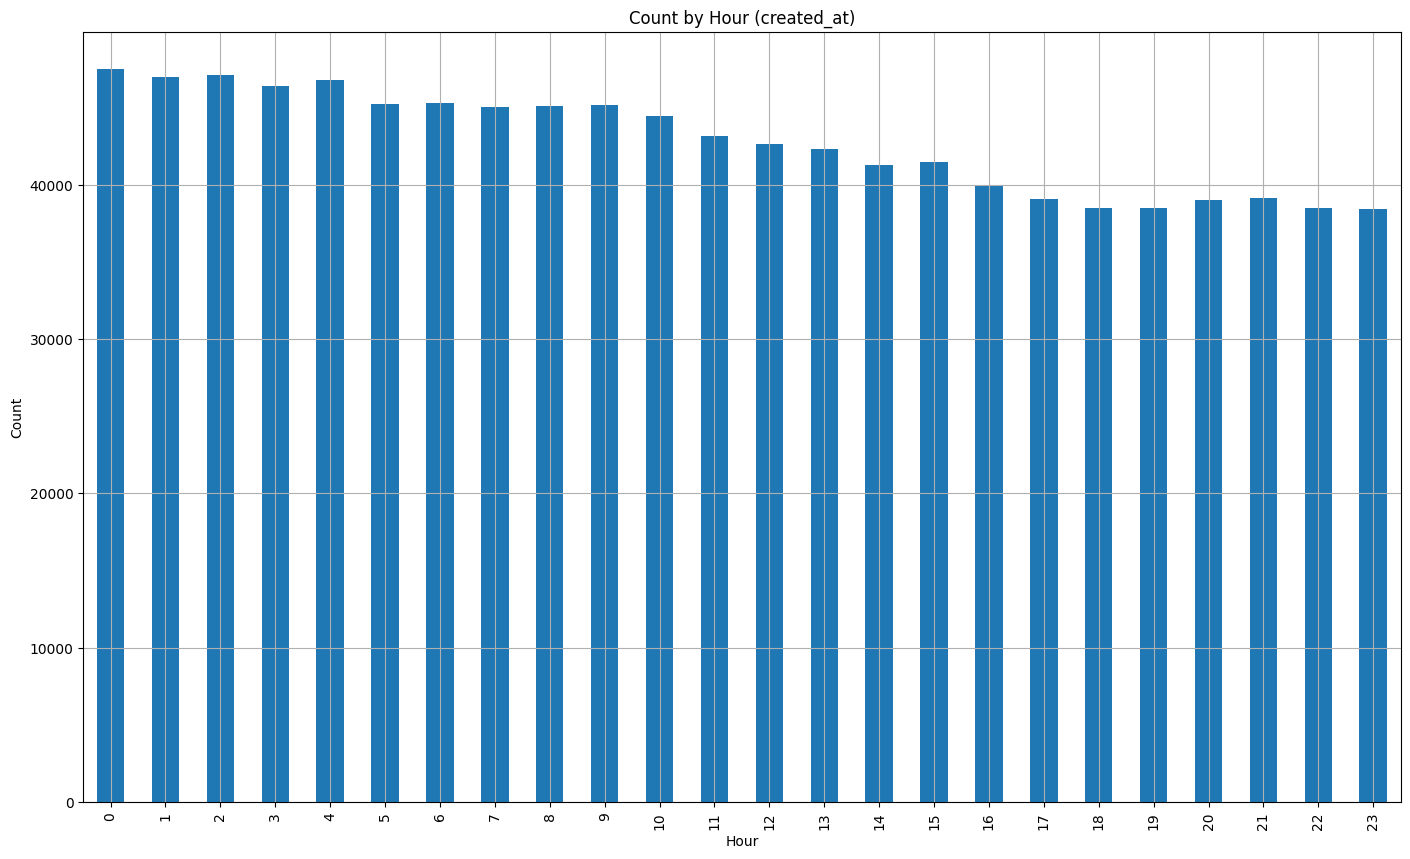

In [38]:
(
	date_components
	.Hour
	.value_counts()
	.sort_index()
	.plot(
        figsize=(17,10), 
        grid=True, 
        title="Count by Hour (created_at)", 
        kind='bar'
    )
)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

# A Clear trend show that repo creating is at peak in midnight
# This plots could have different meanings depnds on what `created_at` means, is it user's local time how created the repo or this is standard time eg: UTC+00:00

### Size

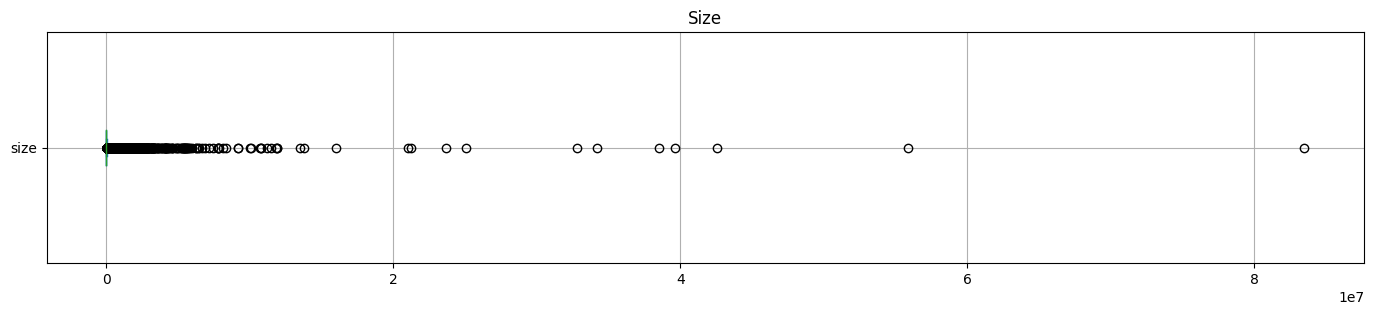

In [39]:
(
	df['size']
	.plot(
        kind='box', 
        vert=False, 
        title="Size", 
        grid=True, 
        figsize=(17,3)
    )
);

In [40]:
print(f"{round(df['size'].lt(100_000).mean()*100,2)}% of Size is less than 100_000")

98.94% of Size is less than 100_000


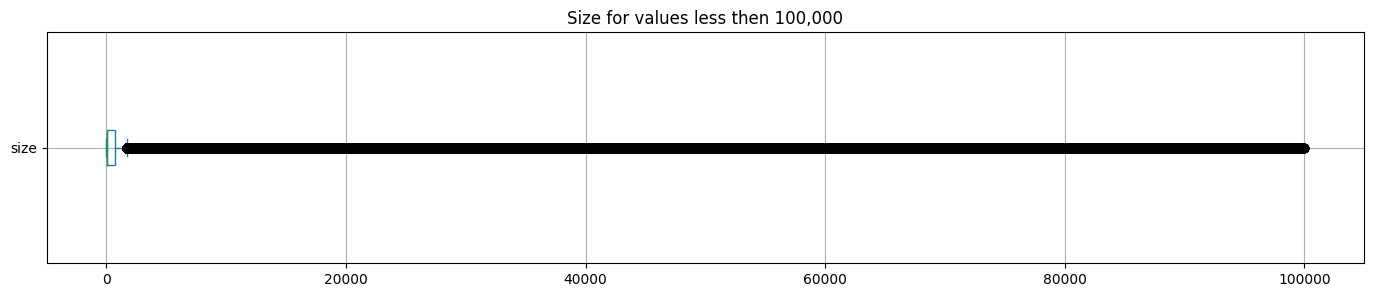

In [41]:
(
	(df['size'][df['size'].lt(100_000)])
	.plot(
        title="Size for values less then 100,000", 
        kind='box', 
        vert=False, 
        grid=True, 
        figsize=(17,3)
    )
);

In [42]:
df['last_update_since_n_days'] = (pd.Timestamp.now() - df.updated_at.astype("datetime64[ns]")).dt.days

/tmp/ipykernel_1210628/2956042144.py:1: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df['last_update_since_n_days'] = (pd.Timestamp.now() - df.updated_at.astype("datetime64[ns]")).dt.days


### stargazers_count

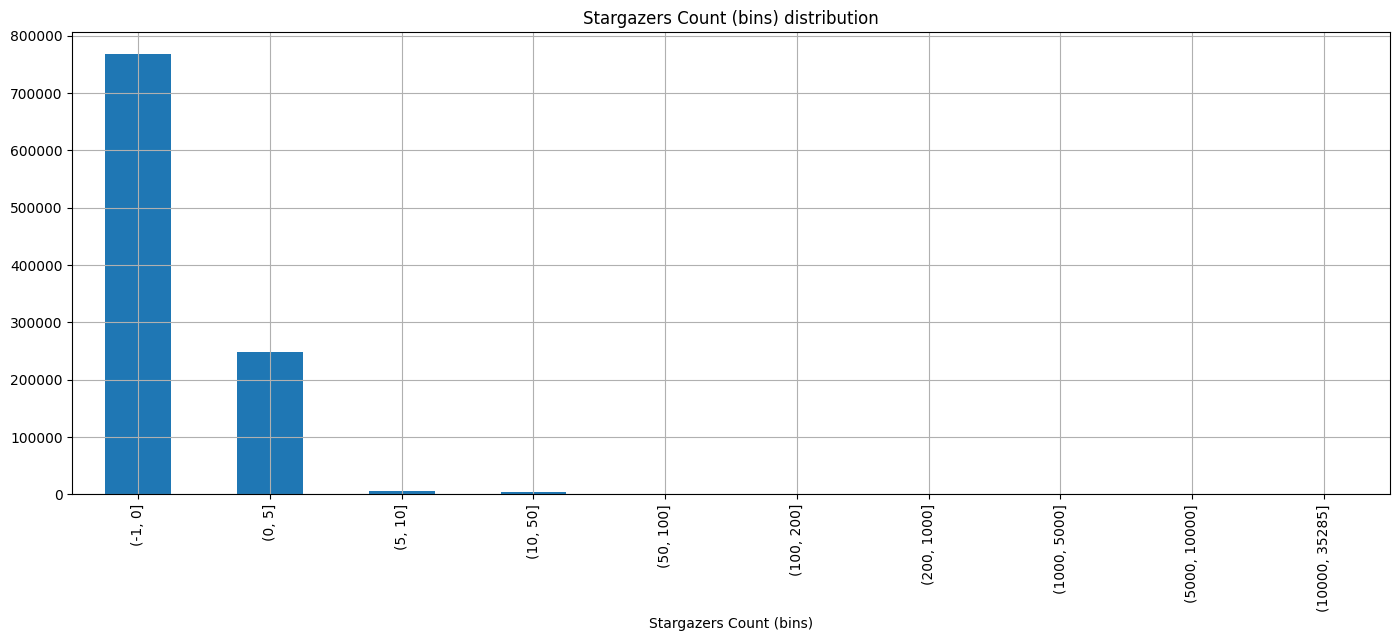

In [43]:
# df.stargazers_count.value_counts().sort_index()
bins = [-1, 0, 5, 10, 50, 100, 200, 1000, 5000, 10000, df['stargazers_count'].max()]

(
    pd.cut(
        df['stargazers_count'], 
        bins=bins, 
        right=True
    ).value_counts()
    .sort_index()
    .plot(
        kind='bar',
        title="Stargazers Count (bins) distribution",
        figsize=(17, 6),
        grid=True,
        xlabel="Stargazers Count (bins)"
    )
);

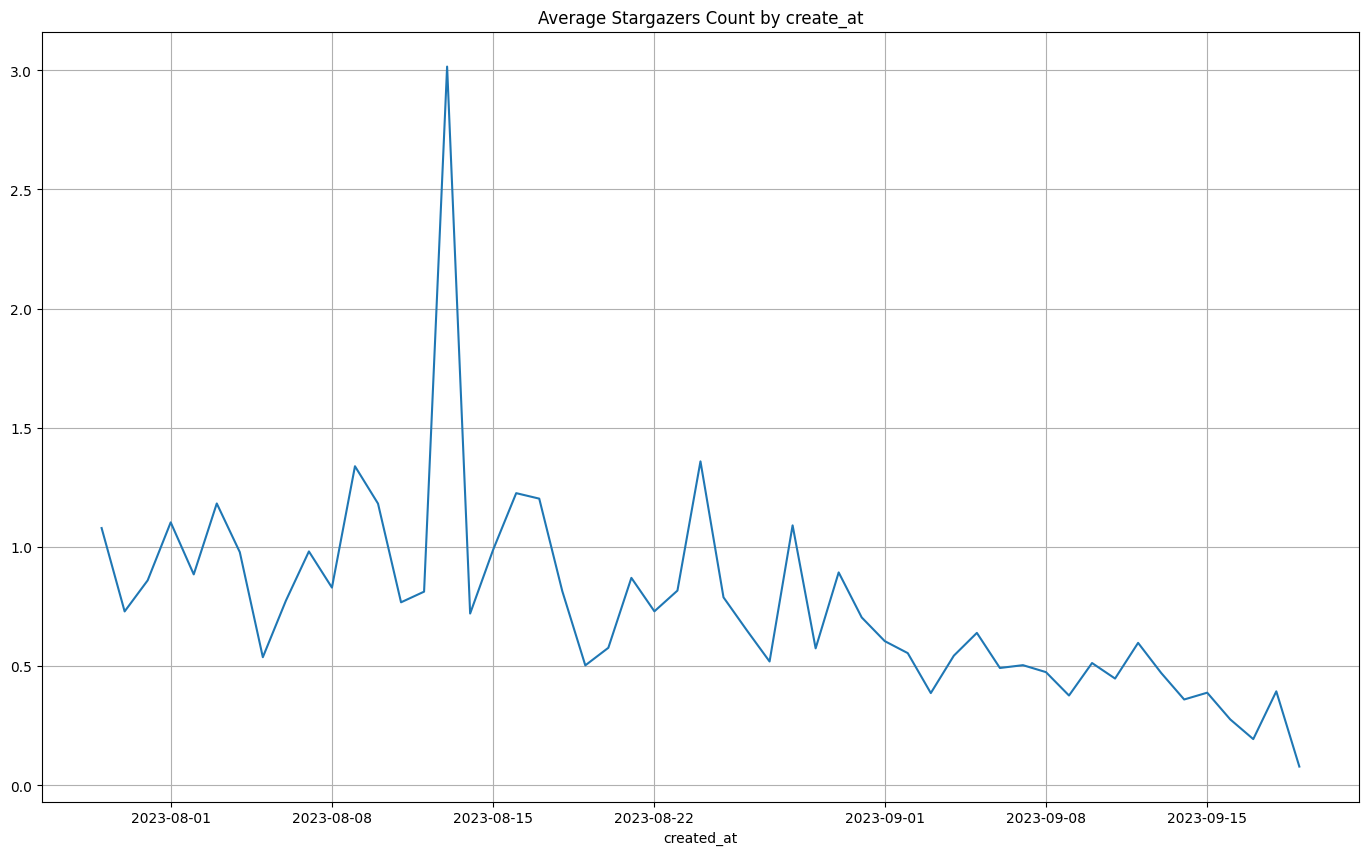

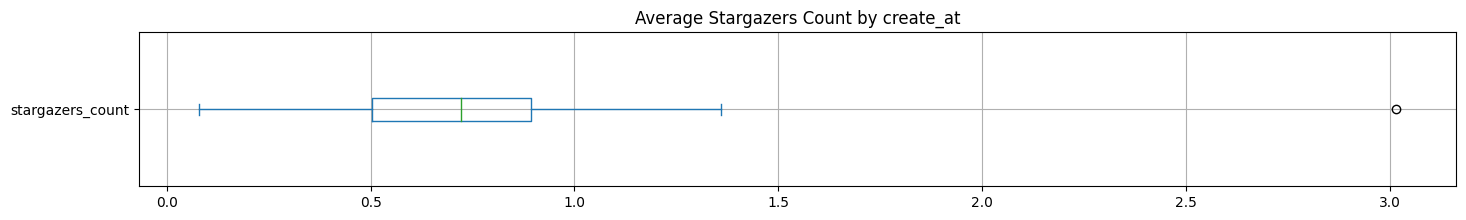

In [45]:
g = (
	df.groupby(
        df.created_at.dt.date
    )
	.stargazers_count
	.mean()
)
(
    g
	.sort_index(level=[0,1], axis=0)
	.rename("Average Stars Count")
	.plot(
        grid=True, 
        title="Average Stargazers Count by create_at", 
        figsize=(17,10)
    )
);

plt.show()

print()


(
	g
	.plot(
        kind='box', 
        title="Average Stargazers Count by create_at", 
        grid=True, 
        vert=False, 
        figsize=(17,2)
    )
);

### watchers_count

In [46]:
# Is watchers_count replica of stargazers_count? 
df.watchers_count.eq(df.stargazers_count).all()

True

### language

In [47]:
# Top 20 languages
top_20_languages = (
	df
	.language
	.value_counts()
	.rename("Count")
	.rename_axis("language")
	.reset_index()
	.assign(
        Perc=lambda x: round(x.Count/df.language.count()*100,2).astype(str).add(" %")
    )
	.head(20)
)
top_20_languages

,language,Count,Perc
0,JavaScript,150335,20.62 %
1,HTML,131247,18.01 %
2,Python,93215,12.79 %
3,Java,55869,7.66 %
4,TypeScript,48176,6.61 %
5,CSS,42659,5.85 %
6,Jupyter Notebook,36998,5.08 %
7,C++,23013,3.16 %
8,C#,22079,3.03 %
9,PHP,15614,2.14 %


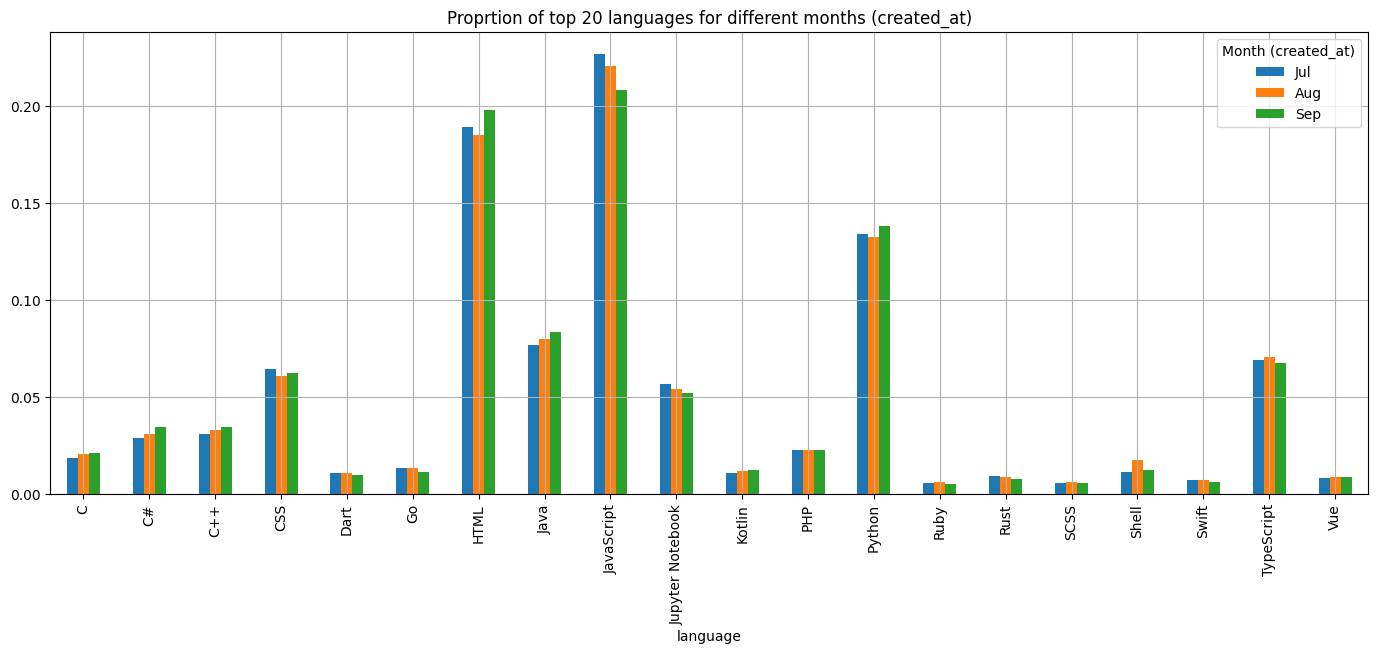

In [48]:
# Top 20 languages by month (created_at)
x = (
	df
	.groupby(df.created_at.dt.month.rename("Month (created_at)"))
	.language
	.value_counts()
	.rename("Count")
	.sort_index(level=[1,0], axis=0)
	.reset_index()
	.where(lambda x: x.language.isin(top_20_languages.language.to_list()), axis=0)
	.dropna(how='all', axis=0)
	.reset_index(drop=True)
)
x['Month (created_at)'] = x['Month (created_at)'].map(dict(zip(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])))
xx = x.pivot_table(
    values='Count',
    index='language',
    columns='Month (created_at)'
)
(xx/xx.sum())[["Jul", "Aug", "Sep"]].plot(
    kind='bar', 
    figsize=(17,6), 
    grid=True, 
    title="Proprtion of top 20 languages for different months (created_at)"
);


### has_issues

In [49]:
print(f"{round(df.has_issues.dropna().mean()*100,2)} % of repos has issues") 

96.7 % of repos has issues


In [50]:
def function(col_name):
    return (
    	df
    	.groupby("language")
    	[col_name]
    	.mean()
    	.sort_values()
    	.loc[
            top_20_languages
            .language
            .to_list()
        ]
    	.rename(f"{col_name} Perc")
    	.mul(100)
    	.round(2)
    	.astype(str)
    	.add(" %")
    	.reset_index()
    )

In [51]:
# Perc of has_issues for top 20 languages
function("has_issues")

,language,has_issues Perc
0,JavaScript,99.78 %
1,HTML,99.59 %
2,Python,99.54 %
3,Java,99.75 %
4,TypeScript,99.6 %
5,CSS,99.67 %
6,Jupyter Notebook,99.7 %
7,C++,99.52 %
8,C#,99.63 %
9,PHP,99.46 %


### has_projects

In [52]:
print(f"{round(df.has_projects.dropna().mean()*100,2)} % of repos has projects") 

99.47 % of repos has projects


In [53]:
# Perc of has_projects for top 20 languages
function("has_projects")

,language,has_projects Perc
0,JavaScript,99.67 %
1,HTML,99.73 %
2,Python,99.43 %
3,Java,99.73 %
4,TypeScript,98.48 %
5,CSS,99.74 %
6,Jupyter Notebook,99.83 %
7,C++,99.3 %
8,C#,99.16 %
9,PHP,99.1 %


In [54]:
# Perc of has_wiki for top 20 languages
function("has_wiki")

,language,has_wiki Perc
0,JavaScript,94.02 %
1,HTML,94.77 %
2,Python,91.93 %
3,Java,92.83 %
4,TypeScript,89.91 %
5,CSS,94.75 %
6,Jupyter Notebook,94.68 %
7,C++,91.05 %
8,C#,85.2 %
9,PHP,92.15 %


In [55]:
# Perc of has_discussions for top 20 languages
function("has_discussions")

,language,has_discussions Perc
0,JavaScript,0.27 %
1,HTML,0.3 %
2,Python,0.69 %
3,Java,0.31 %
4,TypeScript,0.83 %
5,CSS,0.23 %
6,Jupyter Notebook,0.24 %
7,C++,0.57 %
8,C#,0.7 %
9,PHP,0.65 %


In [56]:
# Perc of has_pages for top 20 languages
function("has_pages")

,language,has_pages Perc
0,JavaScript,15.53 %
1,HTML,43.8 %
2,Python,1.21 %
3,Java,0.65 %
4,TypeScript,5.48 %
5,CSS,40.71 %
6,Jupyter Notebook,1.32 %
7,C++,0.79 %
8,C#,0.74 %
9,PHP,3.67 %


In [57]:
# Average forks count  for top 20 languages
(
	df
	.groupby("language")
	.forks_count
	.sum()
	.sort_values()
	.loc[
        top_20_languages
        .language
        .to_list()
    ]
	.rename("forks_count")
	.reset_index()
	.merge(
        top_20_languages[['language', 'Count']]
        .rename(columns={"Count" : "Total-Count"}), 
        on="language"
    )
    .assign(average_forks = lambda x: x.forks_count/x["Total-Count"])
    .drop(columns=["forks_count", "Total-Count"])
)

,language,average_forks
0,JavaScript,0.083021
1,HTML,0.052725
2,Python,0.261889
3,Java,0.102364
4,TypeScript,0.165975
5,CSS,0.063129
6,Jupyter Notebook,0.134278
7,C++,0.154565
8,C#,0.099597
9,PHP,0.072435


In [58]:
# Average open_issues count  for top 20 languages
(
	df
	.groupby("language")
	.open_issues_count
	.sum()
	.sort_values()
	.loc[
        top_20_languages
        .language
        .to_list()
    ]
	.rename("open_issues_count")
	.reset_index()
	.merge(
        top_20_languages[['language', 'Count']]
        .rename(columns={"Count" : "Total-Count"}), 
        on="language"
    )
	.assign(average_open_issues_count = lambda x: x.open_issues_count/x["Total-Count"])
	.drop(columns=["open_issues_count", "Total-Count"])
)

,language,average_open_issues_count
0,JavaScript,0.092334
1,HTML,0.048192
2,Python,0.125978
3,Java,0.113748
4,TypeScript,0.267644
5,CSS,0.043484
6,Jupyter Notebook,0.046678
7,C++,0.082432
8,C#,0.122832
9,PHP,0.101640


In [59]:
# Top 20 default_branchs
(
	df
	.default_branch
	.value_counts()
	.head(20)
	.rename("Count")
	.rename_axis("default_branch")
	.reset_index()
)

,default_branch,Count
0,main,852094
1,master,159969
2,dev,1921
3,develop,1830
4,gh-pages,939
5,development,606
6,Master,273
7,Main,262
8,trunk,156
9,read-potential-cases-fhir,117


In [60]:
# Top 20 license
licenses = pd.DataFrame(df.license.dropna().to_list()).name
(
	licenses
	.value_counts()
	.rename("Count")
	.rename_axis("license")
	.reset_index()
	.head(20)
)

,license,Count
0,MIT License,71698
1,GNU General Public License v3.0,14778
2,Apache License 2.0,12889
3,Other,6592
4,GNU Affero General Public License v3.0,2031
5,The Unlicense,2023
6,Creative Commons Zero v1.0 Universal,1787
7,"BSD 3-Clause ""New"" or ""Revised"" License",1489
8,GNU General Public License v2.0,1297
9,Mozilla Public License 2.0,741


In [61]:
# Distribution of owner_type
(
	df
	.owner_type
	.value_counts(normalize=True)
	.mul(100)
	.round(2)
	.astype(str)
	.add(" %")
	.rename_axis("owner_type")
	.rename("Count")
	.reset_index()
)

,owner_type,Count
0,User,95.75 %
1,Organization,4.25 %


In [62]:
# Distribution of owner_site_admin
(
	df
	.owner_site_admin
	.value_counts(normalize=True)
	.mul(100)
	.round(2)
	.astype(str)
	.add(" %")
	.rename_axis("owner_site_admin")
	.rename("Count")
	.reset_index()
)

,owner_site_admin,Count
0,False,99.99 %
1,True,0.01 %


In [63]:
df.created_at.agg([min,max])

min   2023-07-29 00:00:01+00:00
max   2023-09-19 04:56:14+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [64]:
# created_at must be eirler than pushed_at, let's check it
mask = df.created_at <= df.pushed_at
print("Q: Is created_at always eirler then pushed_at?\nA:", "Yes" if mask.all() else "No")
# The answer is now, let's check it 

Q: Is created_at always eirler then pushed_at?
A: No


In [65]:
print(f"The condition is True for {round(mask.mean()*100,2)} % time")

The condition is True for 99.93 % time


In [66]:
print(f"There are {(~mask).sum()} rows where is condition is not met")

There are 742 rows where is condition is not met


<Axes: title={'center': 'days the pushed_at is eirlier then created_at'}, xlabel='days pushed_at is eirlier than created_at', ylabel='Count'>

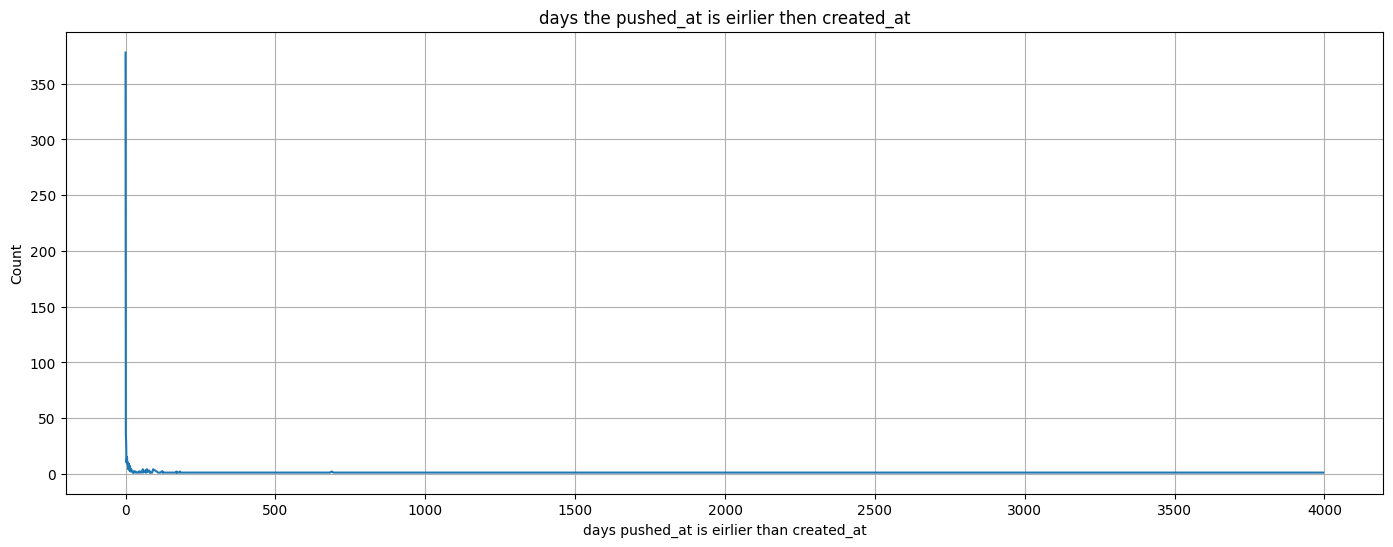

In [67]:
# Let's plot the days the pushed_at is eirlier then created_at
s = (df.created_at[~mask] - df.pushed_at[~mask]).sort_values()
s.dt.days.value_counts().rename("Count").rename_axis("days pushed_at is eirlier than created_at").sort_index().plot(grid=True, figsize=(17,6), title="days the pushed_at is eirlier then created_at", ylabel="Count")


# We see that most of difference is actualy a time difference not a date, so both pushed_at and created_at at the same date but pushed_at is eirlier by some time

In [69]:
# So the following repo created_at on `2023-08-16` but pushed on `2012-09-06` !!!
df.loc[s[s.eq(s.max())].index.to_list(), :].T

,195816
full_name,caelia/chronozilla
html_url,https://github.com/caelia/chronozilla
description,Chronozilla is a Chicken Scheme extension for ...
created_at,2023-08-16 20:12:02+00:00
updated_at,2023-08-16 20:54:22+00:00
pushed_at,2012-09-06 16:20:36+00:00
homepage,None
size,88
stargazers_count,0
watchers_count,0
